# Persiapan

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Orbit/Tugas/Teknikal

Mounted at /content/drive
/content/drive/My Drive/Orbit/Tugas/Teknikal


In [ ]:
# download dan instal modul yang dibutuhkan

!pip install builtwith
!pip install python-whois

In [ ]:
# Import Library yang dibutuhkan

import urllib3
from bs4 import BeautifulSoup
import builtwith
import whois

## Analisa robots.txt

In [ ]:
# Cek robot.txt dari website target

# Creating a PoolManager instance for sending requests.
http = urllib3.PoolManager()
urllib3.disable_warnings() #disable annoying warnings

# Sending a GET request and getting back response as HTTPResponse object.
resp = http.request("GET", "https://books.toscrape.com/robots.txt")

# Print the returned data.
print(resp.data)

b'<html>\r\n<head><title>404 Not Found</title></head>\r\n<body bgcolor="white">\r\n<center><h1>404 Not Found</h1></center>\r\n<hr><center>nginx/1.1.19</center>\r\n</body>\r\n</html>\r\n'


## Cek Ukuran Website
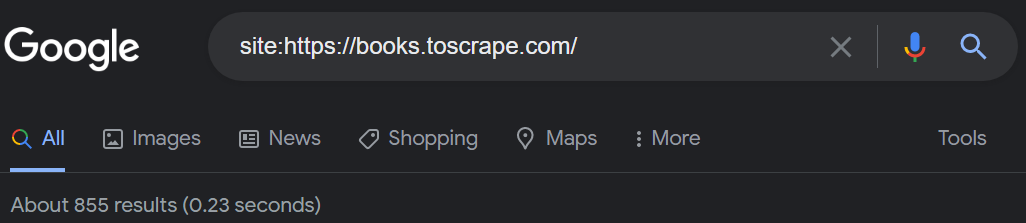

## Analisa Teknologi yang Digunakan

In [ ]:
# Cek teknologi website dibuat menggunakan library builtwith

builtwith.parse('https://books.toscrape.com/')

{'javascript-frameworks': ['jQuery'],
 'web-frameworks': ['Twitter Bootstrap'],
 'web-servers': ['Nginx']}

## Cek Owner Website

In [ ]:
# Cek pemilik website menggunakan protokol whois dengan library python-whois

print(whois.whois('https://books.toscrape.com/'))

{
  "domain_name": [
    "TOSCRAPE.COM",
    "toscrape.com"
  ],
  "registrar": "Amazon Registrar, Inc.",
  "whois_server": "whois.registrar.amazon.com",
  "referral_url": null,
  "updated_date": [
    "2021-05-25 22:54:15",
    "2021-05-25 22:54:16.257000"
  ],
  "creation_date": "2016-06-28 20:26:52",
  "expiration_date": "2022-06-28 20:26:52",
  "name_servers": [
    "NS-1192.AWSDNS-21.ORG",
    "NS-1782.AWSDNS-30.CO.UK",
    "NS-437.AWSDNS-54.COM",
    "NS-740.AWSDNS-28.NET",
    "ns-1192.awsdns-21.org",
    "ns-1782.awsdns-30.co.uk",
    "ns-437.awsdns-54.com",
    "ns-740.awsdns-28.net"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "renewPeriod https://icann.org/epp#renewPeriod"
  ],
  "emails": [
    "abuse@amazonaws.com",
    "owner-2231259@toscrape.com.whoisprivacyservice.org",
    "admin-2231259@toscrape.com.whoisprivacyservice.org",
    "tech-2231259@toscrape.com.whoisprivacyservice.org"
  ],
  "dnssec": "unsigned",
  "

## Analisa Halaman Web

menggunakan inspect element untuk mengetahui class price.
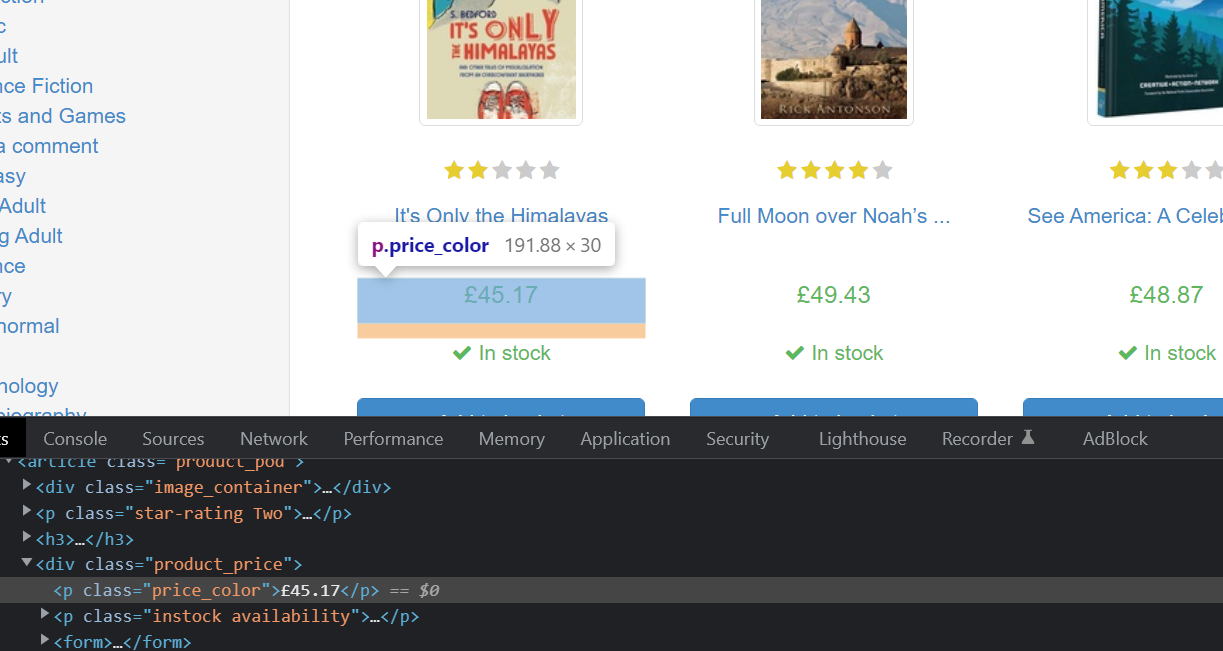

menggunakan inspect element untuk mengetahui class rating
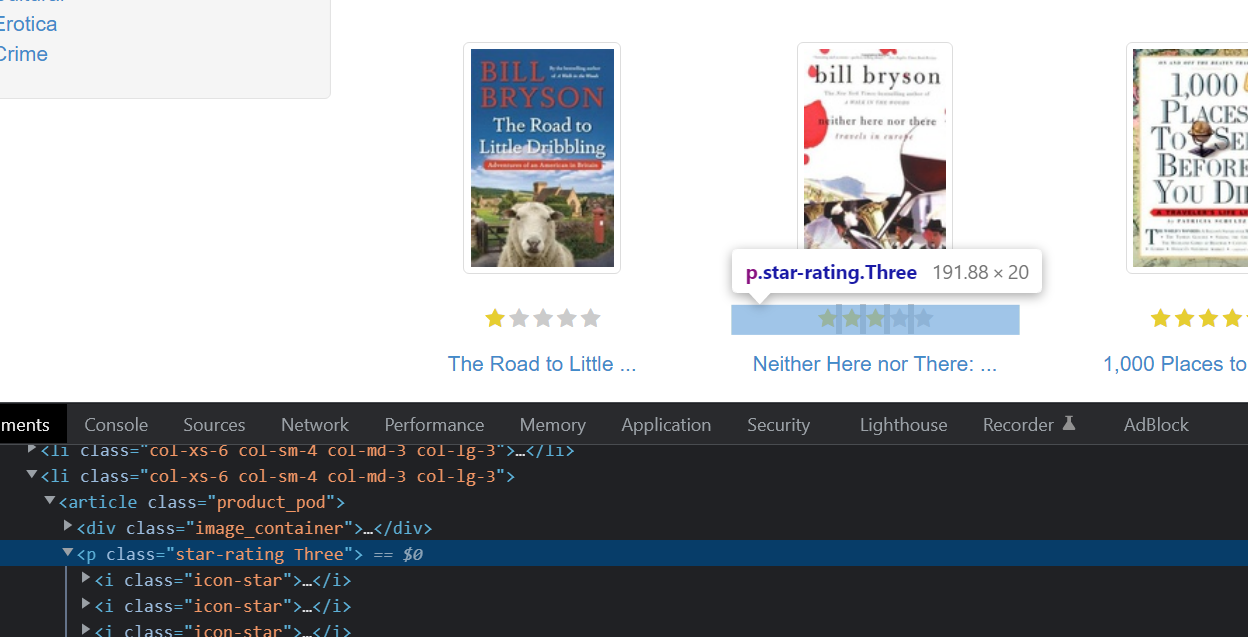

# Web Scraping

In [ ]:
# Scrap entire page
html = http.request("GET", 'https://books.toscrape.com/')
print(html.data)

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" hre

In [ ]:
page = 1
price = []
books = []
urllib3.disable_warnings()

# lakukan looping hingga semua halaman ditelusuri
while page != 50:
      url = f"https://books.toscrape.com/catalogue/page-{page}.html"
      req = http.request("GET", url)
      soup = BeautifulSoup(req.data, 'html.parser')

      # mencari judul dan harga buku
      title = soup.find_all("li", {"class": "col-xs-6 col-sm-4 col-md-3 col-lg-3"})
      for i in title:
        book_title = i.h3.a["title"]
        books.append(book_title)
      for i in soup.find_all("p", class_="price_color"):
        price.append(i.get_text(strip=True))
        
      # pindah halaman
      page = page + 1

# menambahkan judul buku dan harganya ke dalam dictionary
list_book = {}
for x in range(len(books)) :
  list_book[books[x]] = price[x]

print(list_book)


{'A Light in the Attic': '£51.77', 'Tipping the Velvet': '£53.74', 'Soumission': '£50.10', 'Sharp Objects': '£47.82', 'Sapiens: A Brief History of Humankind': '£54.23', 'The Requiem Red': '£22.65', 'The Dirty Little Secrets of Getting Your Dream Job': '£33.34', 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull': '£17.93', 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics': '£22.60', 'The Black Maria': '£52.15', 'Starving Hearts (Triangular Trade Trilogy, #1)': '£13.99', "Shakespeare's Sonnets": '£20.66', 'Set Me Free': '£17.46', "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)": '£52.29', 'Rip it Up and Start Again': '£35.02', 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991': '£57.25', 'Olio': '£23.88', 'Mesaerion: The Best Science Fiction Stories 1800-1849': '£37.59', 'Libertarianism for Beginners': '£51.33', "It's Only the Himalayas": '£45.17', 'In Her Wake

In [71]:
judul_buku = "Tipping the Velvet"
judul_buku = input("Masukan judul buku = ")

print("Memiliki harga = ", list_book[judul_buku])

Masukan judul buku = Tipping the Velvet
Memiliki harga =  £53.74
